<a href="https://colab.research.google.com/github/annisafitribas/ft_credit_home/blob/main/ft_credit_home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Persiapan**

In [3]:
import os, sys, time, json
import warnings
warnings.filterwarnings('ignore')

WORKDIR = '/content/home_credit_task'
os.makedirs(WORKDIR, exist_ok=True)
print("WORKDIR:", WORKDIR)

WORKDIR: /content/home_credit_task


setup awal environment di Python

## Pengecekan

In [4]:
# Colab-friendly installs (only if missing)
try:
    import gdown
except Exception:
    !pip install -q gdown
    import gdown

# ML libs: install if missing
try:
    import lightgbm as lgb
except Exception:
    !pip install -q lightgbm
    import lightgbm as lgb

try:
    import xgboost as xgb
except Exception:
    !pip install -q xgboost
    import xgboost as xgb

try:
    from catboost import CatBoostClassifier
except Exception:
    !pip install -q catboost
    from catboost import CatBoostClassifier

try:
    from pptx import Presentation
    from pptx.util import Inches, Pt
except Exception:
    !pip install -q python-pptx
    from pptx import Presentation
    from pptx.util import Inches, Pt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 989.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 15.6 MB/s eta 0:00:00


blok instalasi otomatis untuk beberapa library penting, khususnya agar bisa langsung jalan di Google Colab atau environment lain yang mungkin belum punya library tersebut.

Berikut detail tiap bagian:

## Library untuk plotting dan data, Library dari scikit-learn (sklearn)

In [5]:
# plotting / data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import joblib

# sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (roc_auc_score, classification_report, confusion_matrix, roc_curve, auc,
                             precision_recall_curve, average_precision_score)
from sklearn.impute import SimpleImputer

EDA & plotting → matplotlib, pandas, numpy
Preprocessing & scaling → StandardScaler, SimpleImputer
Modeling → Logistic Regression, Random Forest
Evaluation → metrics scikit-learn
Utilities → joblib, pathlib

## Pembantu (helper function)

In [6]:
def savefig(fig, filename):
    path = os.path.join(WORKDIR, filename)
    fig.savefig(path, bbox_inches='tight')
    print('Saved plot:', path)

Fungsi ini memudahkan menyimpan semua plot ke folder kerja secara konsisten tanpa harus menulis path lengkap setiap kali.

# **1. Download Dataset**

data disimpan pada google drive

In [7]:
files = {
    'application_train.csv': '1q059QolR6CNxB0PWESAjkEWIprNutajA',
    'application_test.csv' : '1QD7ehk_hzXze0vHQuYa5qyqfDcfI8Sex',
    'bureau.csv'           : '1hndizX1t5ab0DTnKMTedqVJ1ZxLVclhF',
    'bureau_balance.csv'   : '1OXEQb_L6S_mZALJi4--C6RyFI6yOsq4x',
    'credit_card_balance.csv': '1t6Hhsmj0vSCCKUlNXht_xDQ6Z6l4M0Vu',
    'installments_payments.csv': '126xrKCW5EQrxkQoDwmN-yb00ILBKnhR8',
    'POS_CASH_balance.csv' : '1dODAmBQLaylpM2JcCHfc4KNbbtKY7xhA',
    'previous_application.csv': '1D4O7xf-lF_3oBeu6XMwzhpXtSvhcgoBU',
    'HomeCredit_columns_description.csv': '1v2iGGOJjlUGSTsQz-bsjtjtyM5IQp7uW',
    'sample_submission.csv': '1JongVA9fWMYml5XKVnbhm8TUlR5Efs0n'
}

for fname, fid in files.items():
    dest = os.path.join(WORKDIR, fname)
    if not os.path.exists(dest):
        print("Downloading", fname)
        url = f"https://drive.google.com/uc?export=download&id={fid}"
        gdown.download(url, dest, quiet=False)
    else:
        print("Exists:", fname)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1q059QolR6CNxB0PWESAjkEWIprNutajA
From (redirected): https://drive.google.com/uc?export=download&id=1q059QolR6CNxB0PWESAjkEWIprNutajA&confirm=t&uuid=f077f7fb-166d-4d3f-b6e9-243bd59c5b54
To: /content/home_credit_task/application_train.csv
100%|██████████| 166M/166M [00:01<00:00, 117MB/s]


Downloading...
From: https://drive.google.com/uc?export=download&id=1QD7ehk_hzXze0vHQuYa5qyqfDcfI8Sex
To: /content/home_credit_task/application_test.csv
100%|██████████| 26.6M/26.6M [00:00<00:00, 101MB/s] 


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1hndizX1t5ab0DTnKMTedqVJ1ZxLVclhF
From (redirected): https://drive.google.com/uc?export=download&id=1hndizX1t5ab0DTnKMTedqVJ1ZxLVclhF&confirm=t&uuid=844e97d3-d290-4172-97de-767e806fdae6
To: /content/home_credit_task/bureau.csv
100%|██████████| 170M/170M [00:01<00:00, 86.7MB/s]


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1OXEQb_L6S_mZALJi4--C6RyFI6yOsq4x
From (redirected): https://drive.google.com/uc?export=download&id=1OXEQb_L6S_mZALJi4--C6RyFI6yOsq4x&confirm=t&uuid=e39800c2-cf31-4c12-a4ef-a20fd31f8de8
To: /content/home_credit_task/bureau_balance.csv
100%|██████████| 376M/376M [00:03<00:00, 114MB/s]


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1t6Hhsmj0vSCCKUlNXht_xDQ6Z6l4M0Vu
From (redirected): https://drive.google.com/uc?export=download&id=1t6Hhsmj0vSCCKUlNXht_xDQ6Z6l4M0Vu&confirm=t&uuid=e789ad38-c4be-4254-9785-1beb4705ac9b
To: /content/home_credit_task/credit_card_balance.csv
100%|██████████| 425M/425M [00:03<00:00, 133MB/s]


Downloading...
From (original): https://drive.google.com/uc?export=download&id=126xrKCW5EQrxkQoDwmN-yb00ILBKnhR8
From (redirected): https://drive.google.com/uc?export=download&id=126xrKCW5EQrxkQoDwmN-yb00ILBKnhR8&confirm=t&uuid=f49aa175-5145-49a0-bf8c-60b5fffe0bde
To: /content/home_credit_task/installments_payments.csv
100%|██████████| 723M/723M [00:06<00:00, 109MB/s] 


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1dODAmBQLaylpM2JcCHfc4KNbbtKY7xhA
From (redirected): https://drive.google.com/uc?export=download&id=1dODAmBQLaylpM2JcCHfc4KNbbtKY7xhA&confirm=t&uuid=b85b2007-5acd-42a2-abcb-8e1d5b01632f
To: /content/home_credit_task/POS_CASH_balance.csv
100%|██████████| 393M/393M [00:03<00:00, 124MB/s]


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1D4O7xf-lF_3oBeu6XMwzhpXtSvhcgoBU
From (redirected): https://drive.google.com/uc?export=download&id=1D4O7xf-lF_3oBeu6XMwzhpXtSvhcgoBU&confirm=t&uuid=ba79c452-53ef-49da-8793-877466bb65c7
To: /content/home_credit_task/previous_application.csv
100%|██████████| 405M/405M [00:05<00:00, 79.3MB/s]


Downloading...
From: https://drive.google.com/uc?export=download&id=1v2iGGOJjlUGSTsQz-bsjtjtyM5IQp7uW
To: /content/home_credit_task/HomeCredit_columns_description.csv
100%|██████████| 37.4k/37.4k [00:00<00:00, 51.9MB/s]


Downloading...
From: https://drive.google.com/uc?export=download&id=1JongVA9fWMYml5XKVnbhm8TUlR5Efs0n
To: /content/home_credit_task/sample_submission.csv
100%|██████████| 536k/536k [00:00<00:00, 55.2MB/s]


# **2. Pelajari konteks masalah**
Pelajari konteks masalah dari sumber eksternal (MARKDOWN / NOTE: this is guidance — non-code)

In [8]:
md_context = """
**Context / SMK (put into notebook as Markdown)**

- Business: consumer credit scoring (Home Credit). Goal is to predict default (TARGET=1) to support accept/decline/manual-review.
- Common finance metrics: PD (probability of default), LGD (loss given default), EAD (exposure at default), Approval rate, Bad rate.
- Regulations / fairness: ensure model doesn't unfairly discriminate; add explainability later (SHAP).
- Typical objectives: maximize AUC/PR while optimizing business net-savings when integrating decision thresholds.
"""
print(md_context)


**Context / SMK (put into notebook as Markdown)**

- Business: consumer credit scoring (Home Credit). Goal is to predict default (TARGET=1) to support accept/decline/manual-review.
- Common finance metrics: PD (probability of default), LGD (loss given default), EAD (exposure at default), Approval rate, Bad rate.
- Regulations / fairness: ensure model doesn't unfairly discriminate; add explainability later (SHAP).
- Typical objectives: maximize AUC/PR while optimizing business net-savings when integrating decision thresholds.



# **3. Pahami deskripsi kolom yang tersedia**

In [9]:
desc_path = os.path.join(WORKDIR, 'HomeCredit_columns_description.csv')
if os.path.exists(desc_path):
    col_desc = pd.read_csv(
    desc_path,
    encoding='latin1',   # aman untuk file non-UTF-8
    low_memory=False
)
    print("Column description sample:")
    display(col_desc.head(8))
else:
    print("Column description file not found in WORKDIR.")

Column description sample:


,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN


# **4. Tentukan goal, objective, dan metrics**

In [10]:
goal = "Predict probability of loan default (TARGET) to reduce defaults while balancing approval rate."
objective = "Maximize AUC and maximize business net-savings under threshold policy."
metrics = ["ROC-AUC (primary)", "Average Precision (PR-AUC)", "Approve rate vs bad rate", "Net savings"]
print("Goal:", goal)
print("Objective:", objective)
print("Metrics:", metrics)

Goal: Predict probability of loan default (TARGET) to reduce defaults while balancing approval rate.
Objective: Maximize AUC and maximize business net-savings under threshold policy.
Metrics: ['ROC-AUC (primary)', 'Average Precision (PR-AUC)', 'Approve rate vs bad rate', 'Net savings']


# **5. EDA (Exploratory Data Analysis)**
EDA (Exploratory Data Analysis) awal dan loading dataset untuk proyek Home Credit. Mari kita urai langkah-langkahnya satu per satu

## Memuat semua dataset yang dibutuhkan

In [11]:
print("\nLoading CSVs ...")
train = pd.read_csv(os.path.join(WORKDIR, 'application_train.csv'), low_memory=False)
test  = pd.read_csv(os.path.join(WORKDIR, 'application_test.csv'), low_memory=False)
bureau = pd.read_csv(os.path.join(WORKDIR, 'bureau.csv'), low_memory=False)
bureau_balance = pd.read_csv(os.path.join(WORKDIR, 'bureau_balance.csv'), low_memory=False)
credit_card_balance = pd.read_csv(os.path.join(WORKDIR, 'credit_card_balance.csv'), low_memory=False)
installments = pd.read_csv(os.path.join(WORKDIR, 'installments_payments.csv'), low_memory=False)
pos_cash = pd.read_csv(os.path.join(WORKDIR, 'POS_CASH_balance.csv'), low_memory=False)
prev_app = pd.read_csv(os.path.join(WORKDIR, 'previous_application.csv'), low_memory=False)
sample_sub = pd.read_csv(os.path.join(WORKDIR, 'sample_submission.csv'), low_memory=False)

print("Shapes:")
print("train", train.shape, "test", test.shape)
print("bureau", bureau.shape, "bureau_balance", bureau_balance.shape)
print("credit_card_balance", credit_card_balance.shape, "installments", installments.shape)
print("pos_cash", pos_cash.shape, "previous_application", prev_app.shape)


Loading CSVs ...
Shapes:
train (307511, 122) test (48744, 121)
bureau (1716428, 17) bureau_balance (27299925, 3)
credit_card_balance (3840312, 23) installments (13605401, 8)
pos_cash (10001358, 8) previous_application (1670214, 37)


Memuat semua dataset yang dibutuhkan untuk analisis, feature engineering, dan pemodelan, sekaligus mengecek ukurannya untuk memastikan semuanya terbaca.

## Mengecek distribusi target

In [12]:
# quick target dist
print("\n--- TARGET distribution ---")
print(train['TARGET'].value_counts(normalize=True))
# save target plot
fig = plt.figure(figsize=(6,4)); ax = fig.add_subplot(111)
counts = train['TARGET'].value_counts().sort_index()
ax.bar(counts.index.astype(str), counts.values)
ax.set_title('Target distribution (counts)'); ax.set_xlabel('TARGET'); ax.set_ylabel('Count')
savefig(fig, '1_target_distribution.png'); plt.close(fig)


--- TARGET distribution ---
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64
Saved plot: /content/home_credit_task/1_target_distribution.png


Mengecek distribusi target 'TARGET' untuk memahami proporsi kelas dan menyimpan plot visualisasi distribusi kelas.

## Mengidentifikasi 30 fitur dengan nilai yang hilang

In [13]:
# missingness top
missing = train.isna().mean().sort_values(ascending=False).head(30)
fig = plt.figure(figsize=(8,6)); ax = fig.add_subplot(111)
ax.barh(missing.index[::-1], missing.values[::-1]); ax.set_title('Top missing percentage (train)')
ax.set_xlabel('Fraction missing'); savefig(fig, '2_missing_pct_top.png'); plt.close(fig)

Saved plot: /content/home_credit_task/2_missing_pct_top.png


Mengidentifikasi 30 fitur dengan nilai yang hilang (missing) tertinggi di data train dan menyimpan plot visualisasinya.

## Membuat dan menyimpan visualisasi matriks korelasi

In [14]:
# numeric correlation subset
num = train.select_dtypes(include=[np.number]).drop(['SK_ID_CURR','TARGET'], axis=1, errors='ignore')
num_small = num.sample(n=min(30, num.shape[1]), axis=1)
corr = num_small.corr()
fig = plt.figure(figsize=(10,8)); ax = fig.add_subplot(111)
cax = ax.imshow(corr.values, interpolation='nearest')
ax.set_xticks(np.arange(len(corr.columns))); ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(np.arange(len(corr.columns))); ax.set_yticklabels(corr.columns, fontsize=8)
ax.set_title('Correlation matrix (subset)'); fig.colorbar(cax, ax=ax)
savefig(fig, '3_corr_matrix_subset.png'); plt.close(fig)

Saved plot: /content/home_credit_task/3_corr_matrix_subset.png


Membuat dan menyimpan visualisasi matriks korelasi untuk subset fitur numerik guna memahami hubungan antar fitur di data train.

# **6. Data Cleaning dan Data Processing**
(Feature Engineering)

## Aggregations from bureau

In [15]:
# Aggregations from bureau
b_agg = bureau.groupby('SK_ID_CURR').agg(
    bureau_loans_count = ('SK_ID_BUREAU', 'count'),
    bureau_credit_sum_mean = ('AMT_CREDIT_SUM', 'mean'),
    bureau_credit_sum_max = ('AMT_CREDIT_SUM', 'max'),
    bureau_active_cnt = ('CREDIT_ACTIVE', lambda x: (x=='Active').sum())
).reset_index()

Hitung jumlah pinjaman, rata-rata dan maksimum kredit, dan jumlah pinjaman aktif per customer.

## bureau_balance -> bad rate per bureau id then agg

In [16]:
# bureau_balance -> bad rate per bureau id then agg
bb_bad = bureau_balance[bureau_balance['STATUS'].isin(['2','3','4','5'])].groupby('SK_ID_BUREAU').size().rename('bad_months')
bb_tot = bureau_balance.groupby('SK_ID_BUREAU').size().rename('total_months')
bb = pd.concat([bb_bad, bb_tot], axis=1).fillna(0)
bb['bad_rate'] = bb['bad_months'] / bb['total_months']
bureau2 = bureau.merge(bb.reset_index(), on='SK_ID_BUREAU', how='left')
b2_agg = bureau2.groupby('SK_ID_CURR').agg(
    bureau_prev_bad_rate_mean = ('bad_rate','mean'),
    bureau_prev_months_mean = ('total_months','mean')
).reset_index()

b_agg = b_agg.merge(b2_agg, on='SK_ID_CURR', how='left')

Rasio bulan bermasalah (STATUS 2–5) per pinjaman → agregasi ke level customer.

## previous_application aggregates

In [17]:
# previous_application aggregates
prev_agg = prev_app.groupby('SK_ID_CURR').agg(
    prev_count = ('SK_ID_PREV','count'),
    prev_amt_app_mean = ('AMT_APPLICATION','mean'),
    prev_amt_credit_mean = ('AMT_CREDIT','mean'),
    prev_approved = ('NAME_CONTRACT_STATUS', lambda x: (x=='Approved').sum())
).reset_index()

Jumlah aplikasi sebelumnya, rata-rata jumlah aplikasi dan kredit, jumlah aplikasi yang disetujui per customer.

## installments

In [18]:
# installments
inst_agg = installments.groupby('SK_ID_CURR').agg(
    inst_count = ('NUM_INSTALMENT_VERSION','count'),
    inst_amt_sum = ('AMT_PAYMENT','sum'),
    inst_delay_mean = ('DAYS_ENTRY_PAYMENT', lambda x: np.nanmean(x - installments.loc[x.index,'DAYS_INSTALMENT']))
).reset_index()

Jumlah cicilan, total pembayaran, dan rata-rata keterlambatan per customer.

## credit_card & pos

In [19]:
# credit_card & pos
cc_agg = credit_card_balance.groupby('SK_ID_CURR').agg(
    cc_count = ('SK_ID_PREV','count'),
    cc_bal_mean = ('AMT_BALANCE','mean'),
    cc_limit_mean = ('AMT_CREDIT_LIMIT_ACTUAL','mean')
).reset_index()

pos_agg = pos_cash.groupby('SK_ID_CURR').agg(
    pos_count = ('SK_ID_PREV','count'),
    pos_dpd_mean = ('SK_DPD','mean')
).reset_index()

Credit card: jumlah kartu, rata-rata saldo, rata-rata limit kredit
POS cash: jumlah akun, rata-rata DPD (days past due)

## application-level features

In [20]:
def make_app_features(df):
    df = df.copy()
    df['DAYS_BIRTH_YEARS'] = (-df['DAYS_BIRTH']) / 365.25
    df['DAYS_EMPLOYED_YEARS'] = df['DAYS_EMPLOYED'].replace(365243, np.nan) / -365.25
    df['INCOME_CREDIT_RATIO'] = df['AMT_INCOME_TOTAL'] / (df['AMT_CREDIT'] + 1)
    df['CREDIT_GOODS_RATIO'] = df['AMT_CREDIT'] / (df['AMT_GOODS_PRICE'] + 1)
    return df[['SK_ID_CURR','DAYS_BIRTH_YEARS','DAYS_EMPLOYED_YEARS','AMT_INCOME_TOTAL','AMT_CREDIT','INCOME_CREDIT_RATIO','CREDIT_GOODS_RATIO']]

app_train_feats = make_app_features(train)
app_test_feats = make_app_features(test)

Umur (DAYS_BIRTH_YEARS), lama bekerja (DAYS_EMPLOYED_YEARS)
Rasio income/kredit dan kredit/harga barang

## Merge features

In [21]:
# Merge features
train_base = train[['SK_ID_CURR','TARGET']].merge(b_agg, on='SK_ID_CURR', how='left') \
                               .merge(prev_agg, on='SK_ID_CURR', how='left') \
                               .merge(inst_agg, on='SK_ID_CURR', how='left') \
                               .merge(cc_agg, on='SK_ID_CURR', how='left') \
                               .merge(pos_agg, on='SK_ID_CURR', how='left') \
                               .merge(app_train_feats, on='SK_ID_CURR', how='left')

test_base = test[['SK_ID_CURR']].merge(b_agg, on='SK_ID_CURR', how='left') \
                               .merge(prev_agg, on='SK_ID_CURR', how='left') \
                               .merge(inst_agg, on='SK_ID_CURR', how='left') \
                               .merge(cc_agg, on='SK_ID_CURR', how='left') \
                               .merge(pos_agg, on='SK_ID_CURR', how='left') \
                               .merge(app_test_feats, on='SK_ID_CURR', how='left')

print("\nMerged shapes:", train_base.shape, test_base.shape)


Merged shapes: (307511, 26) (48744, 25)


Gabungkan hasil agregasi dari semua sumber data (bureau, previous_app, installments, cc, pos, aplikasi level) per customer

## Pisahin x,y

In [22]:
# Prepare X, y
Y = train_base['TARGET']
X = train_base.drop(['SK_ID_CURR','TARGET'], axis=1)
X_test = test_base.drop(['SK_ID_CURR'], axis=1)

Y = target (TARGET)
X = semua fitur numerik & kategorikal untuk training
X_test = semua fitur untuk test set

## Kategorikan data numeric atau kategorikal

In [23]:
# numeric / categorical separation
num_cols = [c for c in X.columns if X[c].dtype.kind in 'biufc']
cat_cols = [c for c in X.columns if c not in num_cols]

Numerik: integer / float

Kategorikal: sisanya

## Mengatasi missing value

In [24]:
# Impute numeric with median
num_imputer = SimpleImputer(strategy='median')
X[num_cols] = num_imputer.fit_transform(X[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

# For categorical, fill and simple label-encode
for c in cat_cols:
    X[c] = X[c].fillna('MISSING').astype(str)
    X_test[c] = X_test[c].fillna('MISSING').astype(str)
for c in cat_cols:
    X[c], _ = pd.factorize(X[c])
    X_test[c], _ = pd.factorize(X_test[c])

# Ensure X_test has all columns
X_test = X_test.reindex(columns=X.columns, fill_value=0)
print("\nNumber of features:", X.shape[1])


Number of features: 24


**Imputasi missing values**

Numerik: median
Kategorikal: 'MISSING' → label encode
Encode fitur kategorikal
Ubah kategori menjadi angka (factorize) supaya model ML bisa pakai
Pastikan X_test sesuai X_train
Menambahkan kolom yang hilang di test set → jumlah fitur sama dengan X_train

# **7. Split data & scaling**

## Membagi data menjadi train/validation

In [25]:
X_tr, X_val, y_tr, y_val = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# save scaler
joblib.dump(scaler, os.path.join(WORKDIR, 'scaler.pkl'))

['/content/home_credit_task/scaler.pkl']

Membagi data menjadi train/validation
Melakukan scaling numerik agar model lebih stabil
Menyimpan scaler untuk digunakan kembali di test set atau deployment

# **8. Pemodelan: Logistic Regression + hyperparameter tuning**

## Definisi model dan hyperparameter

In [26]:
print("\nModeling (multiple algorithms + light tuning)")

# Definisi model dan hyperparameter
models = {
    'LogisticRegression': LogisticRegression(max_iter=2000, class_weight='balanced', n_jobs=-1),
    'RandomForest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
    'LightGBM': lgb.LGBMClassifier(objective='binary', random_state=42, n_jobs=-1),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}
param_grids = {
    'LogisticRegression': {'C': [0.01, 0.1, 1, 5]},
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [6, 12, None], 'min_samples_leaf': [1,3]},
    'XGBoost': {'n_estimators': [100,200], 'max_depth': [3,6], 'learning_rate':[0.05,0.1]},
    'LightGBM': {'n_estimators':[100,300], 'num_leaves':[31,63], 'learning_rate':[0.01,0.05]},
    'CatBoost': {'iterations':[200,400], 'depth':[4,6], 'learning_rate':[0.03,0.1]}
}


Modeling (multiple algorithms + light tuning)


Mendefinisikan beberapa algoritma pemodelan (Logistic Regression, Random Forest, XGBoost, LightGBM, CatBoost) beserta grid hyperparameter untuk persiapan training dan tuning model.

## Menyiapkan strategi cross-validation

In [27]:
# Stratified K-Fold dan CV setup
n_iter_search = 10
cv_folds = 3
cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

results = []
fitted_models = {}

Menyiapkan strategi cross-validation (Stratified K-Fold) dan struktur data untuk menyimpan hasil training serta model yang telah dipasang.

## Looping tiap model

In [28]:
# Looping tiap model
for name, estimator in models.items():
    print(f"\n>> {name}")
    grid = param_grids.get(name, {})
    if len(grid) == 0:
        print("No grid -> fit default")
        if name == 'LogisticRegression':
            estimator.fit(X_tr_scaled, y_tr)
        else:
            estimator.fit(X_tr, y_tr)
        best = estimator
        cv_best = None
    else:
        # choose data (scaled for LR)
        X_for_fit = X_tr_scaled if name=='LogisticRegression' else X_tr
        rs = RandomizedSearchCV(estimator, param_distributions=grid,
                                n_iter=min(n_iter_search, max(1, np.prod([len(v) for v in grid.values()]))),
                                scoring='roc_auc', n_jobs=-1, cv=cv, random_state=42, verbose=0)
        rs.fit(X_for_fit, y_tr)
        best = rs.best_estimator_
        cv_best = rs.best_score_
        print("Best params:", rs.best_params_)
        print("CV AUC (approx):", cv_best)

    # Evaluasi holdout set
    X_val_use = X_val_scaled if name=='LogisticRegression' else X_val
    proba_val = best.predict_proba(X_val_use)[:,1]
    auc_holdout = roc_auc_score(y_val, proba_val)
    ap = average_precision_score(y_val, proba_val)
    print(f"Holdout AUC: {auc_holdout:.4f} | AP: {ap:.4f}")
    # Simpan model & simpan hasil
    fitted_models[name] = {'model': best, 'proba_val': proba_val}
    results.append({'model': name, 'cv_auc': cv_best, 'holdout_auc': auc_holdout})

    # save model
    joblib.dump(best, os.path.join(WORKDIR, f"model_{name}.pkl"))


>> LogisticRegression
Best params: {'C': 5}
CV AUC (approx): 0.6761919059017285
Holdout AUC: 0.6780 | AP: 0.1566

>> RandomForest
Best params: {'n_estimators': 200, 'min_samples_leaf': 3, 'max_depth': 12}
CV AUC (approx): 0.6784753863743068
Holdout AUC: 0.6829 | AP: 0.1722

>> XGBoost
Best params: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
CV AUC (approx): 0.6942338694997856
Holdout AUC: 0.6978 | AP: 0.1812

>> LightGBM
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5000
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
Best params: {'num_leaves': 31, 'n_estimators': 300, 'learning

Melakukan pelatihan tiap model dengan hyperparameter tuning (jika ada), evaluasi di holdout set menggunakan AUC dan Average Precision, menyimpan model terlatih beserta prediksi dan hasil performanya.

## Menyusun hasil performa semua model ke dalam DataFrame

In [29]:
results_df = pd.DataFrame(results).sort_values('holdout_auc', ascending=False)
results_df.to_csv(os.path.join(WORKDIR, 'model_results_summary.csv'), index=False)
print("\nModel results:\n", results_df)


Model results:
                 model    cv_auc  holdout_auc
4            CatBoost  0.696536     0.700899
3            LightGBM  0.693559     0.700795
2             XGBoost  0.694234     0.697820
1        RandomForest  0.678475     0.682867
0  LogisticRegression  0.676192     0.677958


Menyusun hasil performa semua model ke dalam DataFrame, mengurutkan berdasarkan AUC holdout tertinggi, menyimpan ringkasannya ke CSV, dan menampilkan hasilnya.

# **9. Evaluasi hasil pemodelan (visual + metrics)**

## Membandingkan performa

In [30]:
# ROC comparison
plt.figure(figsize=(8,6))
for name, info in fitted_models.items():
    proba = info['proba_val']
    fpr, tpr, _ = roc_curve(y_val, proba)
    auc_val = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_val:.4f})")
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.title('ROC comparison (holdout)'); plt.xlabel('FPR'); plt.ylabel('TPR'); plt.legend(loc='lower right')
savefig(plt.gcf(), '4_roc_comparison.png'); plt.close()

Saved plot: /content/home_credit_task/4_roc_comparison.png


Membandingkan performa semua model menggunakan ROC curve pada data holdout, menampilkan AUC masing-masing model, dan menyimpan plotnya.

## Membandingkan performa

In [31]:
# PR comparison
plt.figure(figsize=(8,6))
for name, info in fitted_models.items():
    proba = info['proba_val']
    precision, recall, _ = precision_recall_curve(y_val, proba)
    ap = average_precision_score(y_val, proba)
    plt.plot(recall, precision, label=f"{name} (AP={ap:.4f})")
plt.title('Precision-Recall (holdout)'); plt.xlabel('Recall'); plt.ylabel('Precision'); plt.legend(loc='lower left')
savefig(plt.gcf(), '5_pr_comparison.png'); plt.close()

Saved plot: /content/home_credit_task/5_pr_comparison.png


Membandingkan performa semua model menggunakan Precision-Recall curve pada data holdout, menampilkan Average Precision (AP) masing-masing model, dan menyimpan plotnya.

## Mengevaluasi model terbaik pada data holdout dengan threshold 0.5

In [32]:
# Confusion matrix & classification report at threshold 0.5 for top model
top_model_name = results_df.iloc[0]['model']
top_model = fitted_models[top_model_name]['model']
top_proba = fitted_models[top_model_name]['proba_val']
thr = 0.5
y_pred_thr = (top_proba > thr).astype(int)
print(f"\nTop model: {top_model_name} | Holdout AUC: {results_df.iloc[0]['holdout_auc']:.4f}")
print("Classification report (threshold=0.5):")
print(classification_report(y_val, y_pred_thr))
cm = confusion_matrix(y_val, y_pred_thr)
print("Confusion matrix:\n", cm)


Top model: CatBoost | Holdout AUC: 0.7009
Classification report (threshold=0.5):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.55      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.73      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503

Confusion matrix:
 [[56529     9]
 [ 4954    11]]


Mengevaluasi model terbaik pada data holdout dengan threshold 0.5, menampilkan classification report (precision, recall, f1-score) dan confusion matrix untuk melihat distribusi prediksi benar/salah.

## Menyimpan visualisasi feature importance untuk 20 fitur teratas dari model tree-based terbaik

In [33]:
# Save ROC for logistic as well (already have combined)
# Save feature importance for tree-based top model if available
if hasattr(top_model, 'feature_importances_'):
    fi = pd.Series(top_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    fig = plt.figure(figsize=(8,6)); ax = fig.add_subplot(111)
    topn = fi.head(20)[::-1]
    ax.barh(topn.index, topn.values); ax.set_title('Top 20 feature importances (top model)')
    savefig(fig, '6_feature_importance_top20.png'); plt.close(fig)

Saved plot: /content/home_credit_task/6_feature_importance_top20.png


Menyimpan visualisasi feature importance untuk 20 fitur teratas dari model tree-based terbaik (jika tersedia), agar bisa memahami fitur mana yang paling berpengaruh terhadap prediksi.

# **10. Ukur dampak pemodelan & rekomendasi bisnis**

## Menghitung metrik bisnis dari model prediksi

In [38]:
# Basic assumptions (adjustable)
assumptions = {
    'avg_exposure': float(train['AMT_CREDIT'].mean()) if 'AMT_CREDIT' in train.columns else 1000000.0,
    'LGD': 0.6,
    'profit_margin': 0.05
}
print("Business assumptions:", assumptions)

def business_metrics(probs, y_true, threshold, assumptions):
    approved = probs < threshold
    n_total = len(y_true)
    n_approved = int(approved.sum())

    if n_approved == 0:
        return None
    approved_bad = int(y_true[approved].sum())
    approved_good = n_approved - approved_bad
    bad_rate_approved = approved_bad / n_approved

    # Baseline: semua disetujui
    baseline_bad_expected = y_true.sum()

    # Dengan model
    model_bad_expected = approved_bad

    reduction = baseline_bad_expected - model_bad_expected
    savings = reduction * assumptions['avg_exposure'] * assumptions['LGD']

    lost_good = ((probs >= threshold) & (y_true == 0)).sum()

    lost_profit = lost_good * assumptions['avg_exposure'] * assumptions['profit_margin']
    net_savings = savings - lost_profit
    return {
        'threshold': threshold,
        'n_total': n_total,
        'n_approved': n_approved,
        'approve_rate': n_approved / n_total,
        'approved_bad': approved_bad,
        'approved_good': approved_good,
        'bad_rate_approved': bad_rate_approved,
        'reduction_in_defaults': reduction,
        'savings': savings,
        'lost_good': lost_good,
        'lost_profit': lost_profit,
        'net_savings': net_savings
    }

Business assumptions: {'avg_exposure': 599025.9997057016, 'LGD': 0.6, 'profit_margin': 0.05}


Menghitung metrik bisnis dari model prediksi, termasuk jumlah aplikasi disetujui, risiko gagal bayar, potensi penghematan (savings), kerugian karena menolak calon baik, dan net impact (net_savings) berdasarkan asumsi bisnis seperti exposure rata-rata, LGD, dan profit margin.

## Mengevaluasi berbagai threshold persetujuan model untuk menentukan ambang optimal

In [41]:
# Evaluate thresholds
ths = np.linspace(0.01, 0.5, 60)
biz_list = []

for t in ths:
    bm = business_metrics(top_proba, y_val.values, t, assumptions)
    if bm is not None:
        biz_list.append(bm)

biz_df = pd.DataFrame(biz_list)
biz_df.to_csv(os.path.join(WORKDIR, 'business_impact_thresholds.csv'), index=False)

# Plot
plt.figure(figsize=(8,5))
plt.plot(biz_df['threshold'], biz_df['net_savings'] / 1e9)

opt_idx = biz_df['net_savings'].idxmax()

plt.axvline(
    biz_df.loc[opt_idx, 'threshold'],
    linestyle='--',
    label=f"opt thr={biz_df.loc[opt_idx,'threshold']:.3f}"
)

plt.title('Net savings vs threshold')
plt.xlabel('Threshold (approve if prob < t)')
plt.ylabel('Net savings (billion units)')
plt.legend()

savefig(plt.gcf(), '7_biz_net_savings_vs_threshold.png')
plt.close()

best_thr_row = biz_df.loc[opt_idx]
print("Optimal threshold (by net_savings):")
print(best_thr_row.to_dict())

Saved plot: /content/home_credit_task/7_biz_net_savings_vs_threshold.png
Optimal threshold (by net_savings):
{'threshold': 0.07644067796610168, 'n_total': 61503.0, 'n_approved': 36667.0, 'approve_rate': 0.5961823000504041, 'approved_bad': 1621.0, 'approved_good': 35046.0, 'bad_rate_approved': 0.04420868901191807, 'reduction_in_defaults': 3344.0, 'savings': 1201885765.8095195, 'lost_good': 21492.0, 'lost_profit': 643713339.283747, 'net_savings': 558172426.5257726}


Mengevaluasi berbagai threshold persetujuan model untuk menentukan ambang optimal yang memaksimalkan net_savings. Hasil disimpan dan divisualisasikan sebagai grafik Net savings vs Threshold, serta mencetak threshold terbaik berdasarkan metrik bisnis.

# **Visualisasi**

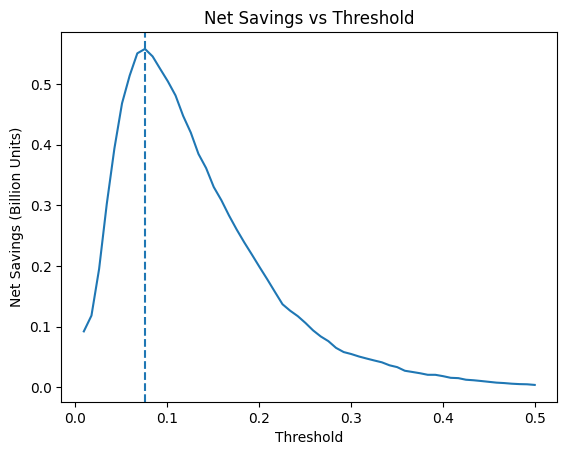

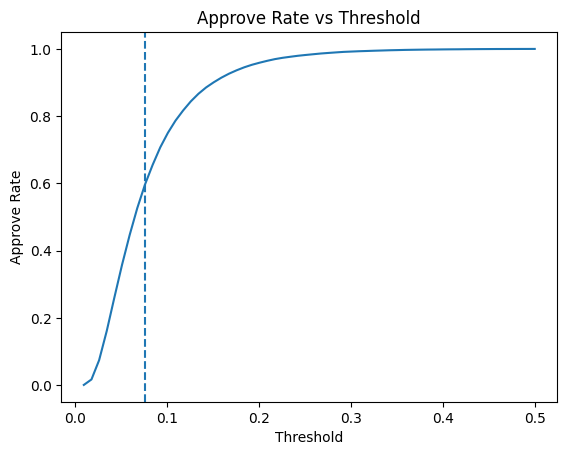

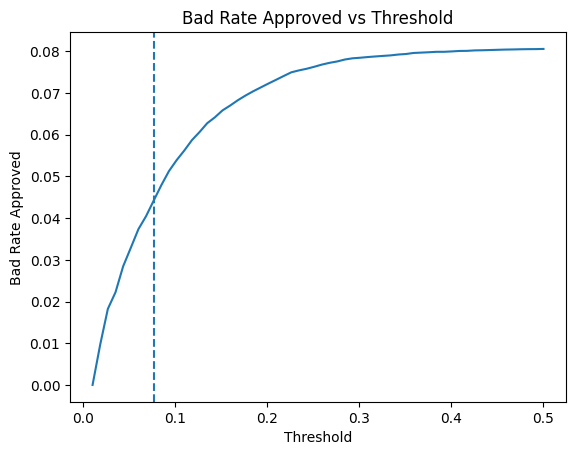

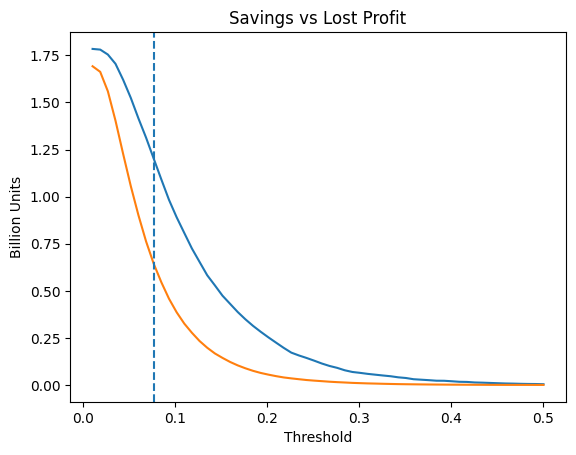

Threshold optimal: 0.07644067796610168


In [45]:
import matplotlib.pyplot as plt

# Cari threshold optimal
opt_idx = biz_df['net_savings'].idxmax()
opt_thr = biz_df.loc[opt_idx, 'threshold']

# 1. Net Savings vs Threshold
plt.figure()
plt.plot(biz_df['threshold'], biz_df['net_savings'] / 1e9)
plt.axvline(opt_thr, linestyle='--')
plt.title("Net Savings vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Net Savings (Billion Units)")
plt.show()

# 2. Approve Rate vs Threshold
plt.figure()
plt.plot(biz_df['threshold'], biz_df['approve_rate'])
plt.axvline(opt_thr, linestyle='--')
plt.title("Approve Rate vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Approve Rate")
plt.show()

# 3. Bad Rate Approved vs Threshold
plt.figure()
plt.plot(biz_df['threshold'], biz_df['bad_rate_approved'])
plt.axvline(opt_thr, linestyle='--')
plt.title("Bad Rate Approved vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Bad Rate Approved")
plt.show()

# 4. Savings vs Lost Profit
plt.figure()
plt.plot(biz_df['threshold'], biz_df['savings'] / 1e9)
plt.plot(biz_df['threshold'], biz_df['lost_profit'] / 1e9)
plt.axvline(opt_thr, linestyle='--')
plt.title("Savings vs Lost Profit")
plt.xlabel("Threshold")
plt.ylabel("Billion Units")
plt.show()

print("Threshold optimal:", opt_thr)

**Penjelasan**
Threshold optimal 0,076 artinya hanya nasabah dengan risiko gagal bayar < 7,6% yang disetujui kreditnya.
Nilai ini dipilih karena menghasilkan keuntungan bersih paling besar, dengan cara menekan kredit macet semaksimal mungkin, meskipun sebagian nasabah baik harus ditolak.
Strateginya termasuk konservatif / risk-averse.